<a href="https://colab.research.google.com/github/Dhanyamanogaran/assignment_1/blob/main/ISI_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the excelfile
df1=pd.read_excel("/content/Actuator_I.xlsx")

In [3]:
#check for missing values
df1.isnull().sum()

SL_No                        0
Bearing_to_bearing_Length    0
Driver_Shaft_length          0
Worm_length                  0
Star_Washer_position         0
Thickness                    0
Height                       0
Load                         0
Torque_Variation             0
dtype: int64

In [4]:
#print top 3 records of  the given data
df1.head(3)

,SL_No,Bearing_to_bearing_Length,Driver_Shaft_length,Worm_length,Star_Washer_position,Thickness,Height,Load,Torque_Variation
0,1,147.719654,127.939450,68.015373,Bearing End,1.468,2.17,2943,High
1,2,147.786309,127.937728,68.015137,Bearing End,1.502,2.19,3090,High
2,3,148.117257,127.949102,68.006165,Worm End,1.518,2.20,3276,Low


In [5]:
#read the second excel file
df2=pd.read_excel("/content/Actuator_II.xlsx")

In [6]:
#check for missing value
df2.isnull().sum()

SL_No                        0
Bearing_to_bearing_Length    0
Driver_Shaft_length          0
Worm_length                  0
Star_Washer_position         0
Thickness                    0
Height                       0
Load                         0
Torque_Variation             0
dtype: int64

In [7]:
#lets print top 3 records of the data
df2.head(3)

,SL_No,Bearing_to_bearing_Length,Driver_Shaft_length,Worm_length,Star_Washer_position,Thickness,Height,Load,Torque_Variation
0,31,147.754492,127.934493,68.019427,Worm End,1.501,2.15,3139,High
1,32,147.796452,127.936002,68.014478,Bearing End,1.481,2.14,3119,High
2,33,148.125088,127.945418,68.003925,Bearing End,1.512,2.26,3335,Low


In [11]:
#lets combine the two different data into single dataframe
df=pd.concat([df1,df2])

In [14]:
#get the information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 25
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SL_No                      56 non-null     int64  
 1   Bearing_to_bearing_Length  56 non-null     float64
 2   Driver_Shaft_length        56 non-null     float64
 3   Worm_length                56 non-null     float64
 4   Star_Washer_position       56 non-null     object 
 5   Thickness                  56 non-null     float64
 6   Height                     56 non-null     float64
 7   Load                       56 non-null     int64  
 8   Torque_Variation           56 non-null     object 
dtypes: float64(5), int64(2), object(2)
memory usage: 4.4+ KB


In [15]:
#lets get the statistical summary of the data
 df.describe()

,SL_No,Bearing_to_bearing_Length,Driver_Shaft_length,Worm_length,Thickness,Height,Load
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,28.500000,147.944321,127.940785,68.010436,1.498339,2.183393,3160.321429
std,16.309506,0.207581,0.005506,0.005362,0.017772,0.044570,135.304251
min,1.000000,147.700324,127.930758,68.000361,1.459000,2.080000,2825.000000
25%,14.750000,147.736932,127.936075,68.006123,1.485000,2.157500,3055.250000
50%,28.500000,147.951666,127.940124,68.010132,1.499000,2.190000,3158.000000
75%,42.250000,148.148514,127.945612,68.015196,1.510500,2.210000,3261.000000
max,56.000000,148.196285,127.949911,68.019757,1.543000,2.280000,3433.000000


In [69]:
df.head(2)

,SL_No,Bearing_to_bearing_Length,Driver_Shaft_length,Worm_length,Star_Washer_position,Thickness,Height,Load,Torque_Variation
0,1,147.719654,127.939450,68.015373,Bearing End,1.468,2.17,2943,High
1,2,147.786309,127.937728,68.015137,Bearing End,1.502,2.19,3090,High


In [18]:
#finding the categorical_features
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['Star_Washer_position', 'Torque_Variation']

In [22]:
pd.value_counts(df['Torque_Variation'])

High    28
Low     28
Name: Torque_Variation, dtype: int64

In [21]:
pd.value_counts(df['Star_Washer_position'])

Bearing End    32
Worm End       24
Name: Star_Washer_position, dtype: int64

In [25]:
#finding the unique features
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Star_Washer_position and number of categories are 2
The feature is Torque_Variation and number of categories are 2


In [79]:
#encode the categorical features
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
enc=label.fit_transform(df.Torque_Variation)

task **2**

In [36]:
data1=pd.read_excel('/content/Resolution_TimeI.xlsx')

In [37]:
data2=pd.read_excel('/content/Resolution_TimeII.xlsx')

In [38]:
data=pd.concat([data1,data2])

In [39]:
data.isnull().sum()

SL_No                0
Volume              58
Team_Experience     58
Domain_Expertise    58
Resolution_Time     57
dtype: int64

In [41]:
data.head(3)

,SL_No,Volume,Team_Experience,Domain_Expertise,Resolution_Time
0,1,69.0,20.0,15.0,NaN
1,2,84.0,25.0,20.0,NaN
2,3,72.0,21.0,15.0,NaN


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


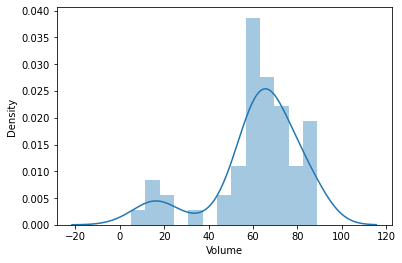

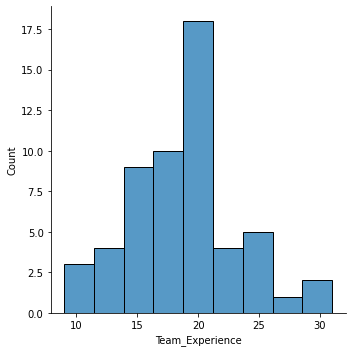

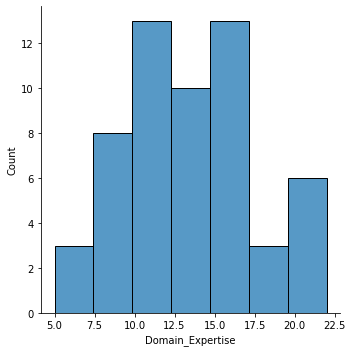

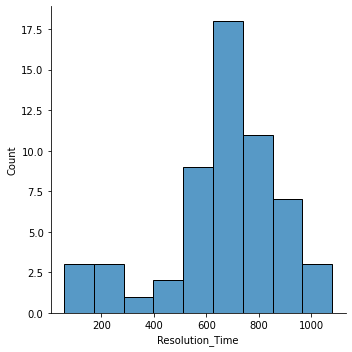

In [43]:
#lets find the distribution of the features
sns.distplot(data.Volume)
sns.displot(data.Team_Experience)
sns.displot(data.Domain_Expertise)
sns.displot(data.Resolution_Time)

In [48]:
#replace missing values with meadian
data['Resolution_Time'].fillna(data['Resolution_Time'].median(),inplace=True)
data['Domain_Expertise'].fillna(data['Domain_Expertise'].median(),inplace=True)
data['Team_Experience'].fillna(data['Team_Experience'].median(),inplace=True)
data['Volume'].fillna(data['Volume'].median(),inplace=True)

In [49]:
data.isnull().sum()

SL_No               0
Volume              0
Team_Experience     0
Domain_Expertise    0
Resolution_Time     0
dtype: int64

In [50]:
data.describe()

,SL_No,Volume,Team_Experience,Domain_Expertise,Resolution_Time
count,114.000000,114.000000,114.000000,114.000000,114.000000
mean,29.000000,62.877193,18.921053,13.210526,673.649123
std,16.524586,13.883294,3.223654,2.879509,160.104887
min,1.000000,5.000000,9.000000,5.000000,57.000000
25%,15.000000,64.000000,19.000000,13.000000,687.000000
50%,29.000000,64.000000,19.000000,13.000000,687.000000
75%,43.000000,64.000000,19.000000,13.000000,687.000000
max,57.000000,89.000000,31.000000,22.000000,1081.000000


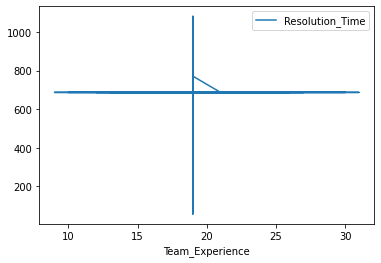

In [59]:
df1=pd.DataFrame(data,columns=['Resolution_Time','Team_Experience'])
df1.plot(x='Team_Experience',y='Resolution_Time',kind='line')
plt.show()


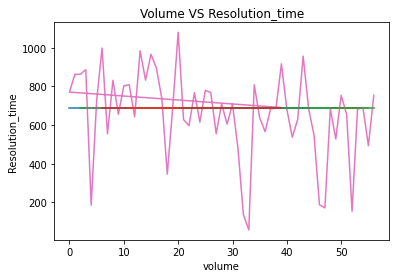

In [60]:
#checking the relation between volume and resolution_time
data.groupby('Volume')['Resolution_Time'].plot().kind='line'
plt.xlabel('volume')
plt.ylabel('Resolution_time')
plt.title('Volume VS Resolution_time')
plt.show()

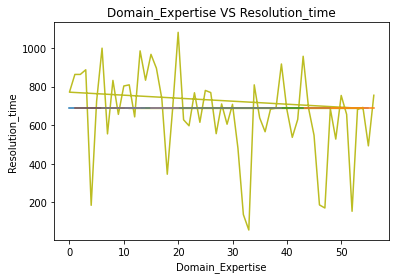

In [61]:
#checking the relation between Domain_Expertise and resolution_time
data.groupby('Domain_Expertise')['Resolution_Time'].plot().kind='line'
plt.xlabel('Domain_Expertise')
plt.ylabel('Resolution_time')
plt.title('Domain_Expertise VS Resolution_time')
plt.show()

In [65]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
fs=sc.fit_transform(data)


In [66]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
ms= MinMaxScaler()
dm=ms.fit_transform(data)

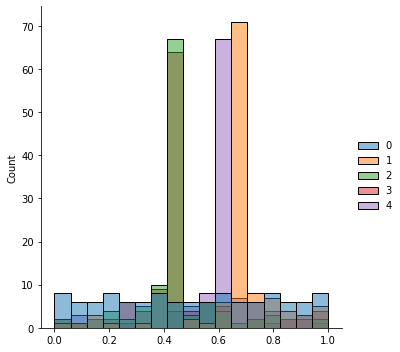

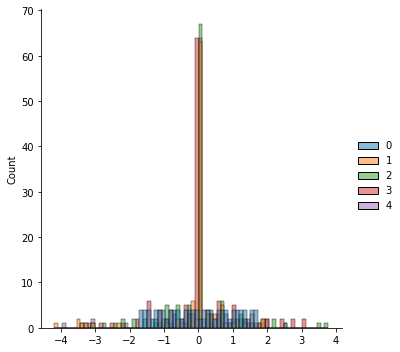

In [68]:
sns.displot(dm)
sns.displot(fs)

There is a change in the relationship between variables and resolution time after transformation